# Building an ANN with the Iris Dataset
    
    ## Introduction
    Artificial Neural Networks (ANNs) are a cornerstone of modern machine learning. In this lab, you will construct a simple ANN to classify iris plants into one of three species based on the length and width of their sepals and petals. This exercise will help you understand the basics of neural networks, including their architecture, activation functions, and the backpropagation algorithm for training.

    ## Dataset Reference
    The Iris dataset was introduced by the British statistician and biologist Ronald Fisher in 1936. It is widely used as a beginner's dataset for machine learning classification problems. You can access this dataset via the `sklearn.datasets` module.
    

In [43]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## Part 1: Load and Explore the Data
    ### Load the Dataset
    **Hint**: Use `sklearn.datasets.load_iris()` to load the Iris dataset into your environment.

    ### Explore the Data
    **Hint**: Use `pandas` to examine the first few rows of the dataset and `matplotlib` or `seaborn` to visualize the feature distributions.
    

In [44]:
iris= load_iris()
# Convert the iris dataset to dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# adding target variable to the dataframe
df['target'] = iris.target

#few fist 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


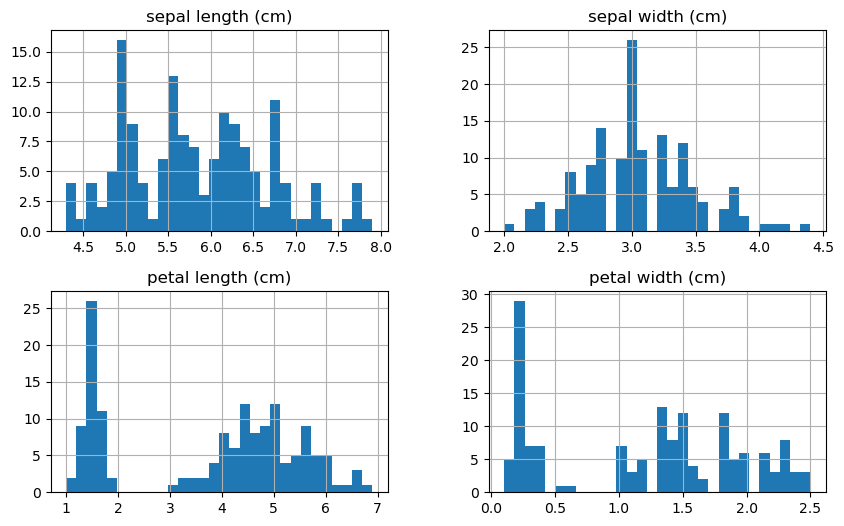

In [45]:
#visualize the feature distributions.
feature=df.drop('target', axis=1)
feature.hist(bins=30, figsize=(10, 6), layout=(2, 2))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

C:\Users\hayoo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


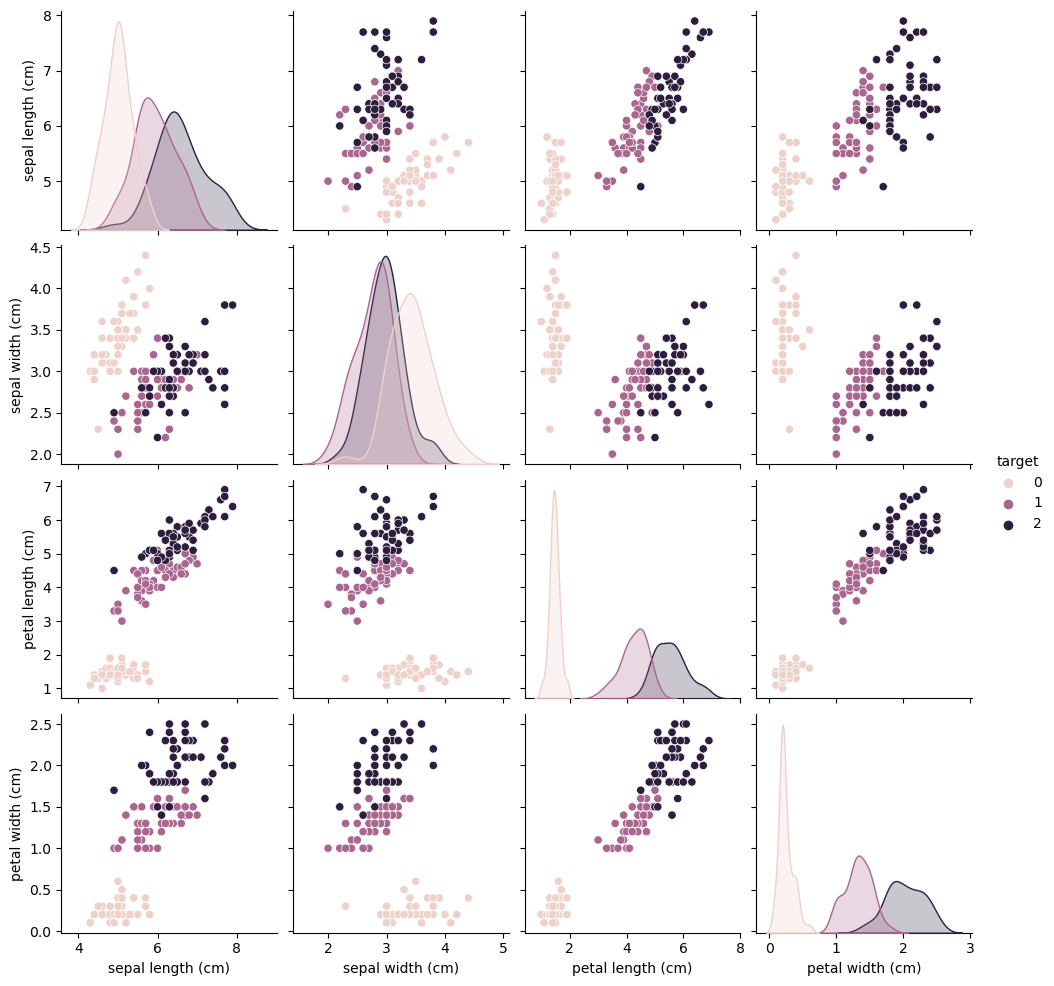

In [46]:
sns.pairplot(df, hue="target")

## Part 2: Prepare the Data
    ### Split the Data into Training and Test Sets
    **Hint**: Use `train_test_split` from `sklearn.model_selection` to divide the data into training and test sets.

    ### Scale the Features
    **Hint**: Standardize the features using `StandardScaler` from `sklearn.preprocessing`.
    

In [47]:
X = df.drop('target', axis=1)
y = df['target']

In [48]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [50]:
# Split the Data into Training and Test Sets
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [51]:
X_train.shape

(120, 4)

In [52]:
y_train.head()

22    0
15    0
65    1
11    0
42    0
Name: target, dtype: int32

In [53]:
# Scale the Features
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [54]:
y_train_arr = np.array(y_train) # Convert from a Series to array
y_train_reshaped = y_train_arr.reshape(-1, 1) # reshape to 2D
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train_reshaped)

In [55]:
y_train.shape

(120, 3)

## Part 3: Build the ANN Model
    ### Define the Model
    **Hint**: Use `keras` to define a sequential model. Start with a single hidden layer with a ReLU activation function.

    ### Compile the Model
    **Hint**: Compile your model specifying an optimizer and loss function appropriate for classification.
    

In [56]:
# Define the Model
model = Sequential()

In [57]:
#add hidden layer
model.add(Dense(units=6, input_dim=X_train.shape[1], activation='relu'))

In [58]:
#add output layer
model.add(Dense(units=3, activation='softmax')) # using sofrmax because there are more than two classes. 

In [59]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 30        
                                                                 
 dense_7 (Dense)             (None, 3)                 21        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Part 4: Train the Model
    ### Train the Model
    **Hint**: Fit the model on your training data with a reasonable number of epochs.

    ### Evaluate the Model
    **Hint**: Use the test data to evaluate your model and report the accuracy.
    

In [61]:
# Train the Model
train_model = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 2s 44ms/step - loss: 1.3976 - accuracy: 0.1875 - val_loss: 1.3954 - val_accuracy: 0.2083
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 1.3555 - accuracy: 0.1771 - val_loss: 1.3626 - val_accuracy: 0.2083
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 1.3173 - accuracy: 0.1771 - val_loss: 1.3293 - val_accuracy: 0.2083
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 1.2769 - accuracy: 0.1771 - val_loss: 1.2960 - val_accuracy: 0.2083
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 1.2391 - accuracy: 0.1771 - val_loss: 1.2624 - val_accuracy: 0.2083
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 1.2025 - accuracy: 0.1771 - val_loss: 1.2312 - val_accuracy: 0.2083
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 1.1683 - accuracy: 0.2188 - val_loss: 1.1972 - val_accuracy: 0.2500
Epoch 8/100

In [62]:
model_prediction = model.predict(X_test)

1/1 [==============================] - 0s 108ms/step


In [63]:
model_prediction = np.argmax(model_prediction, axis=-1)

In [64]:
# Evaluate the model
print(accuracy_score(y_test, model_prediction))

0.9666666666666667


In [65]:
# One-hot encode y_test
y_test_one_hot = to_categorical(y_test, num_classes=3)

#evaluate the model
model.evaluate(X_test, y_test_one_hot)

1/1 [==============================] - 0s 28ms/step - loss: 0.1981 - accuracy: 0.9667


[0.19806507229804993, 0.9666666388511658]

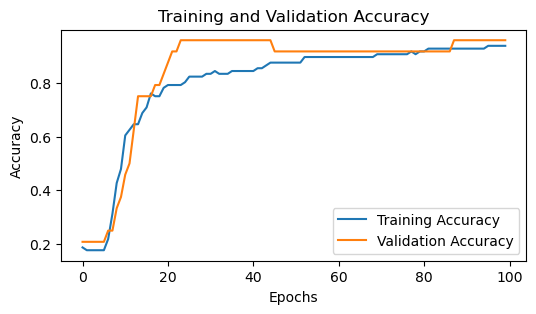

In [66]:
plt.figure(figsize=(6, 3))
plt.plot(train_model.history['accuracy'], label='Training Accuracy')
plt.plot(train_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

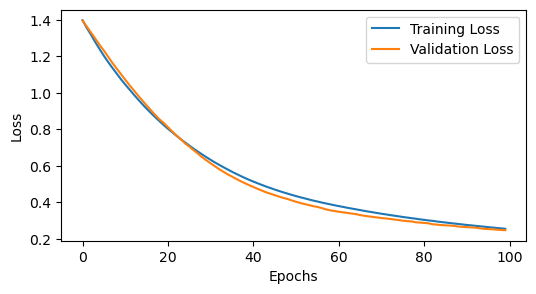

In [67]:
plt.figure(figsize=(6, 3))

# Loss plot
plt.plot(train_model.history['loss'], label='Training Loss')
plt.plot(train_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

## Part 5: Experiment and Improve
    ### Tune the Model
    **Hint**: Try adding more hidden layers or neurons, or use different activation functions and see if the accuracy improves.

    ### Regularization and Dropout
    **Hint**: Implement dropout or regularization techniques to improve the model's generalization.
    

In [68]:
# Implement dropout
model_dropOut = Sequential()
model_dropOut.add(Dense(units=30, activation='relu', input_shape=(X_train.shape[-1], )))
model_dropOut.add(Dense(units=30, activation='relu'))
model_dropOut.add(Dropout(0.3))
model_dropOut.add(Dense(units=30, activation='relu'))
model_dropOut.add(Dropout(0.3))
model_dropOut.add(Dense(units=3, activation='softmax')) #output layer

# Compile the model
model_dropOut.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
model_dropOut.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                150       
                                                                 
 dense_9 (Dense)             (None, 30)                930       
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_10 (Dense)            (None, 30)                930       
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                                 
 dense_11 (Dense)            (None, 3)                 93        
                                                                 
Total params: 2103 (8.21 KB)
Trainable params: 2103 (8

In [70]:
train_model2= model_dropOut.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 2s 43ms/step - loss: 1.1168 - accuracy: 0.4583 - val_loss: 1.0573 - val_accuracy: 0.6250
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 1.0305 - accuracy: 0.4271 - val_loss: 1.0057 - val_accuracy: 0.6250
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.9342 - accuracy: 0.6771 - val_loss: 0.9483 - val_accuracy: 0.6667
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.9018 - accuracy: 0.6667 - val_loss: 0.8818 - val_accuracy: 0.8333
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.7823 - accuracy: 0.7708 - val_loss: 0.8160 - val_accuracy: 0.9167
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.7154 - accuracy: 0.7917 - val_loss: 0.7475 - val_accuracy: 0.8750
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6919 - accuracy: 0.7812 - val_loss: 0.6859 - val_accuracy: 0.8750
Epoch 8/100

In [71]:
# Evaluate the model
model_dropOut.evaluate(X_test, y_test_one_hot)

1/1 [==============================] - 0s 58ms/step - loss: 0.0193 - accuracy: 1.0000


[0.019294671714305878, 1.0]


## Part 4: Model Evaluation
### Evaluate the Model
To effectively evaluate your artificial neural network, consider the following metrics:
- **Accuracy**: This is the fraction of predictions our model got right.
- **Confusion Matrix**: A table used to describe the performance of a classification model on a set of test data for which the true values are known.
- **Precision, Recall, and F1-Score**: These metrics provide more insight into the types of errors made by the classifier.
**Hint**: Use `classification_report` and `confusion_matrix` from `sklearn.metrics` to calculate these metrics.

### Visualize Model Performance
Visualizing the learning curves (loss and accuracy over epochs) can provide insights into the training process, such as whether the model is fitting or overfitting.
**Hint**: Use `matplotlib.pyplot` to plot training and validation loss and accuracy.


In [72]:
# Predict
y_pred_prob = model_dropOut.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

1/1 [==============================] - 0s 86ms/step
Accuracy: 100.00%


In [73]:
# classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [74]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

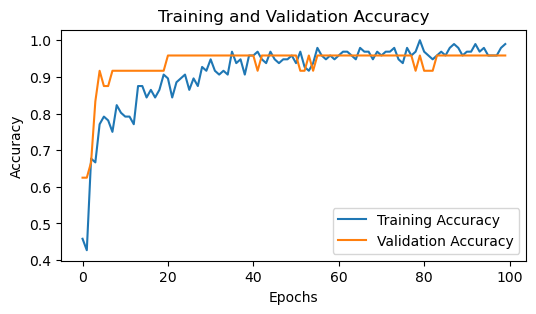

In [75]:
plt.figure(figsize=(6, 3))
plt.plot(train_model2.history['accuracy'], label='Training Accuracy')
plt.plot(train_model2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

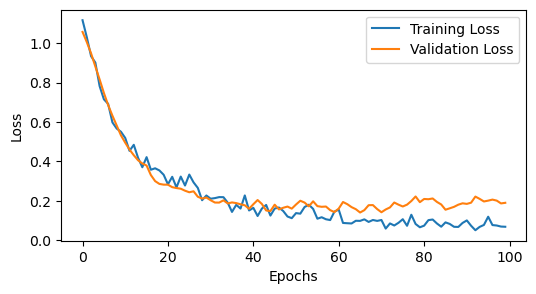

In [76]:
plt.figure(figsize=(6, 3))

# Loss plot
plt.plot(train_model2.history['loss'], label='Training Loss')
plt.plot(train_model2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

## Conclusion
    Summarize what the learner should have gained from this lab, including a better understanding of how ANNs work and how they can be applied to real-world classification problems.
    